In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline


In [2]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()


True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))


str

str

In [4]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2"
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [5]:
# Set the ticker for SSgA Active Trust - S&P 500 ETF TRUST ETF (SPY)
tickers = ["SPY"]

# Confirm the value of the  `tickers` variable created
tickers


['SPY']

In [6]:
# Set the values for start_date and end_date using the pd.Timestamp function
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function

start_date = pd.Timestamp("2019-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-01", tz="America/New_York").isoformat()


In [7]:
# Set timeframe to one day (1D) for the Alpaca API
timeframe = "1D"

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000


In [8]:
# Use the Alpaca get_barset function to gather the price information for SPY
# Include the function parameters: tickers, timeframe, start, and end
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
spy_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = limit_rows
).df

# Review the resulting `portfolio_prices_df` DataFrame. 
display(spy_prices_df.head())
display(spy_prices_df.tail())


SPY                                    
                             open      high     low   close    volume
time                                                                 
2019-07-01 00:00:00-04:00  296.68  296.9200  294.33  295.61  57465080
2019-07-02 00:00:00-04:00  295.61  296.4900  291.21  296.46  52076552
2019-07-03 00:00:00-04:00  297.18  298.8200  297.02  298.76  28494654
2019-07-05 00:00:00-04:00  297.44  298.6400  296.01  298.36  38871871
2019-07-08 00:00:00-04:00  297.01  298.2579  296.22  296.86  34973243

SPY                                    
                             open      high     low   close    volume
time                                                                 
2021-06-25 00:00:00-04:00  425.90  427.0943  425.55  426.57  50460394
2021-06-28 00:00:00-04:00  427.17  427.6500  425.89  427.48  43937373
2021-06-29 00:00:00-04:00  427.89  428.5600  427.13  427.68  32097572
2021-06-30 00:00:00-04:00  427.20  428.7800  427.18  428.08  46776402
2021-07-01 00:00:00-04:00  428.83  430.6000  428.80  430.47  44147835

In [9]:
# Create an empty DataFrame for holding the closing prices
spy_closing_prices_df = pd.DataFrame()

# Select the close price in the spy_prices_df Dataframe
# That will be set equal to spy_closing_prices_df for the same ticker value
for ticker in tickers:
    spy_closing_prices_df[ticker] = spy_prices_df[ticker]["close"]

# For the new closing_prices_df DataFrame, keep only the date component
spy_closing_prices_df.index = spy_closing_prices_df.index.date

# View the first and last five rows of the closing_prices_df DataFrame
display(spy_closing_prices_df.head())
display(spy_closing_prices_df.tail())


,SPY
2019-07-01,295.61
2019-07-02,296.46
2019-07-03,298.76
2019-07-05,298.36
2019-07-08,296.86


,SPY
2021-06-25,426.57
2021-06-28,427.48
2021-06-29,427.68
2021-06-30,428.08
2021-07-01,430.47


In [10]:
# Compute daily returns of the spy_closing_prices_df DataFrame using the pct_change function 
# Be sure to drop the first row of NaN values
spy_daily_returns_df = spy_closing_prices_df.pct_change().dropna()

# Review the first and last five rows of the spy_daily_returns_df DataFrame
display(spy_daily_returns_df.head())
display(spy_daily_returns_df.tail())


,SPY
2019-07-02,0.002875
2019-07-03,0.007758
2019-07-05,-0.001339
2019-07-08,-0.005027
2019-07-09,0.001347


,SPY
2021-06-25,0.003482
2021-06-28,0.002133
2021-06-29,0.000468
2021-06-30,0.000935
2021-07-01,0.005583


In [11]:
# Using the Pandas describe function, generate summary statistics
# for spy
spy_daily_returns_df.describe()


,SPY
count,505.000000
mean,0.000878
std,0.016293
min,-0.116340
25%,-0.004280
50%,0.001542
75%,0.007459
max,0.094737


<AxesSubplot:title={'center':'SPY - Daily Returns'}>

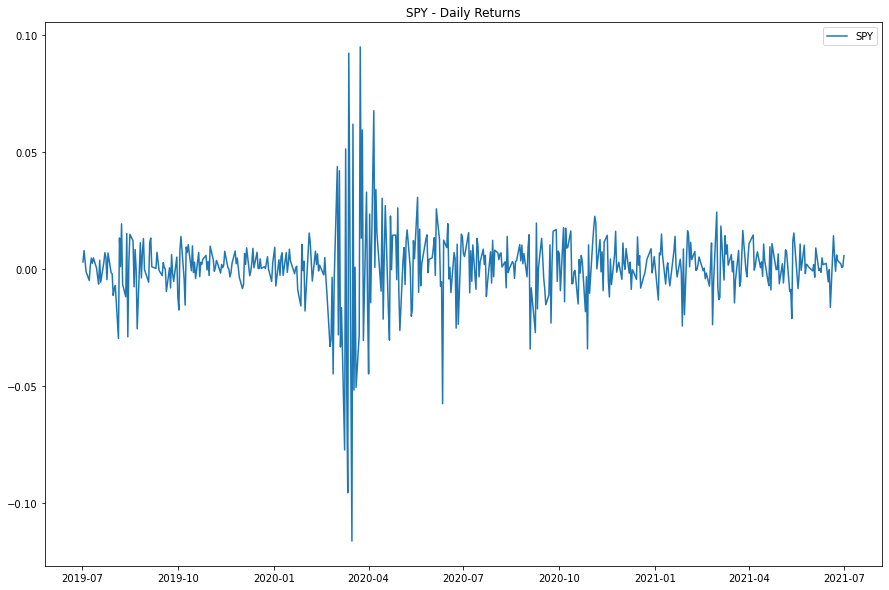

In [13]:
# Plot the SPY daily returns
spy_daily_returns_df.plot(
    figsize = (15,10),
    title = 'SPY - Daily Returns'
)

In [16]:
# Create DataFrame for cummulative returns using cumprod() function
spy_cummulative_returns_df = (1 + spy_daily_returns_df).cumprod()

# display tail to check last few lines of data
spy_cummulative_returns_df.tail()

,SPY
2021-06-25,1.443016
2021-06-28,1.446095
2021-06-29,1.446771
2021-06-30,1.448124
2021-07-01,1.456209


<AxesSubplot:title={'center':'SPY - Daily Returns'}>

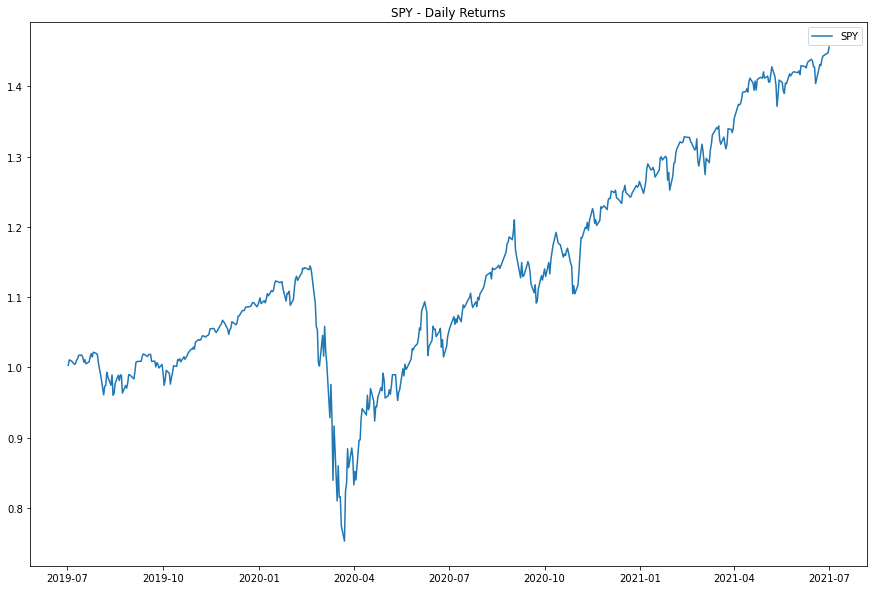

In [17]:
# Plot the SPY cummulative return
spy_cummulative_returns_df.plot(
    figsize = (15,10),
    title = 'SPY - Daily Returns'
)